<a href="https://colab.research.google.com/github/ashark1/Data-Science-/blob/main/Salmon_Catch_Statistics_Scotland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset**

Salmon catch statistics for Scotland (1952–2022)

https://www.kaggle.com/datasets/mikhail1681/salmon-catch-statistics-for-scotland-19522022/code

**Research Question**

Which fishing methods out of two methods **Fixed Engine : Released and Net and Coble: Released** are the most effective or have the greatest impact on fish populations?

**Catch Efficiency**

Analyze the total number of fish caught through both method to gauge efficiency.

**Trends Over Time**

Examine how catch numbers  for both methods have evolved over the years.

**Comparison Across Fish Types**

Compare how effective both method is for different types of fish (e.g., wild MSW, wild 1SW, sea trout, finnock).:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



from google.colab import files
uploaded = files.upload()

fisheries=pd.read_csv('salmon n trout.csv',encoding='latin-1')

Saving salmon n trout.csv to salmon n trout.csv


In [ ]:
# Display the first few rows of the dataframe
fisheries.head(100
              )

,ï»¿District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
0,Tweed,101,1,East,Fixed Engine: Retained,1952,February,2,107,400.5,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,4.0
1,Tweed,101,1,East,Net and Coble: Retained,1952,February,2,6606,24856.9,...,0.0,453,705.8,0,0.0,0,0.0,0,0.0,31.0
2,Tweed,101,1,East,Fixed Engine: Retained,1952,March,3,185,703.1,...,0.0,13,21.3,0,0.0,0,0.0,0,0.0,10.0
3,Tweed,101,1,East,Net and Coble: Retained,1952,March,3,7008,26151.9,...,0.5,848,1172.5,0,0.0,0,0.0,0,0.0,31.0
4,Tweed,101,1,East,Fixed Engine: Retained,1952,April,4,484,1912.3,...,0.0,14,20.0,0,0.0,0,0.0,0,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tweed,101,1,East,Net and Coble: Retained,1957,September,9,263,1665.6,...,320.7,1435,3172.0,0,0.0,0,0.0,0,0.0,31.0
96,Tweed,101,1,East,Fixed Engine: Retained,1958,February,2,79,250.4,...,0.0,1,1.8,0,0.0,0,0.0,0,0.0,14.0
97,Tweed,101,1,East,Net and Coble: Retained,1958,February,2,1978,6659.2,...,0.0,344,476.7,0,0.0,0,0.0,0,0.0,34.0
98,Tweed,101,1,East,Fixed Engine: Retained,1958,March,3,634,2160.0,...,0.0,45,64.4,0,0.0,0,0.0,0,0.0,16.0


In [ ]:
# Display a summary of the dataset
fisheries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23140 entries, 0 to 23139
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ï»¿District             23140 non-null  object 
 1   District ID             23140 non-null  int64  
 2   Report order            23140 non-null  int64  
 3   Region                  23140 non-null  object 
 4   Method                  23140 non-null  object 
 5   Year                    23140 non-null  int64  
 6   Month                   23140 non-null  object 
 7   Month number            23140 non-null  int64  
 8   Wild MSW number         23140 non-null  int64  
 9   Wild MSW weight (kg)    23140 non-null  float64
 10  Wild 1SW number         23140 non-null  int64  
 11  Wild 1SW weight (kg)    23140 non-null  float64
 12  Sea trout number        23140 non-null  int64  
 13  Sea trout weight (kg)   23140 non-null  float64
 14  Finnock number          23140 non-null

In [ ]:
# Filter out necessary columns if needed or deal with missing data
fisheries.dropna(inplace=True)  # Example of dropping rows with missing data



In [ ]:
# Group data by method and aggregate the catch numbers and weights
method_summary = fisheries.groupby('Method').agg({
    'Wild MSW number': 'sum',
    'Wild 1SW number': 'sum',
    'Sea trout number': 'sum',
    'Finnock number': 'sum',
    'Farmed MSW number': 'sum',
    'Farmed 1SW number': 'sum',

}).reset_index()

# Display the summary table
method_summary


,Method,Wild MSW number,Wild 1SW number,Sea trout number,Finnock number,Farmed MSW number,Farmed 1SW number
0,Fixed Engine: Released,514,352,179,0,0,0
1,Fixed Engine: Retained,2490858,4618034,1564981,41,1809,1732
2,Net and Coble: Released,182,109,86,0,0,0
3,Net and Coble: Retained,2941128,3399454,3735238,23,450,804


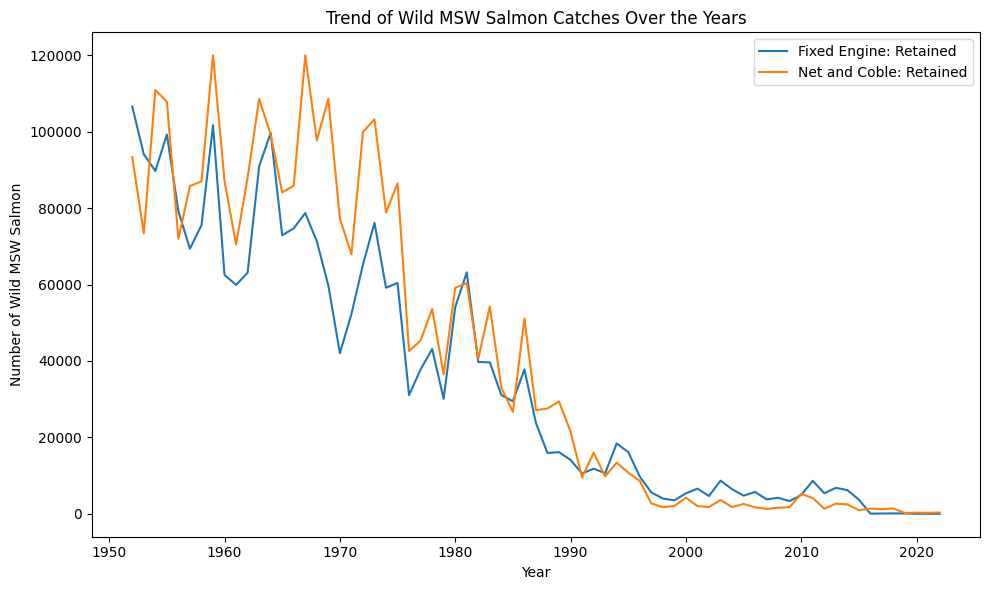

In [ ]:
# Preparing data for plotting
significant_methods = ['Fixed Engine: Retained', 'Net and Coble: Retained']
filtered_data = fisheries[fisheries['Method'].isin(significant_methods)]

yearly_catches = filtered_data.groupby(['Year', 'Method']).agg({
    'Wild MSW number': 'sum',



}).reset_index()


# Plotting trends over time
fig, ax = plt.subplots(figsize=(10, 6))  # Change here to create only one plot
for method in significant_methods:
    subset = yearly_catches[yearly_catches['Method'] == method]
    ax.plot(subset['Year'], subset['Wild MSW number'], label=method)  # Change here to plot on the single ax
ax.set_title('Trend of Wild MSW Salmon Catches Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Wild MSW Salmon')
ax.legend()

plt.tight_layout()
plt.show()  # Show the plot



**Analysis**

Trend of Wild MSW Salmon Catches:
Both "Fixed Engine: Retained" and "Net and Coble: Retained" methods show a general fluctuation in catches over the years.
"Net and Coble: Retained" shows a somewhat more consistent level of catch across the years compared to "Fixed Engine: Retained," which appears to have more significant peaks and troughs.

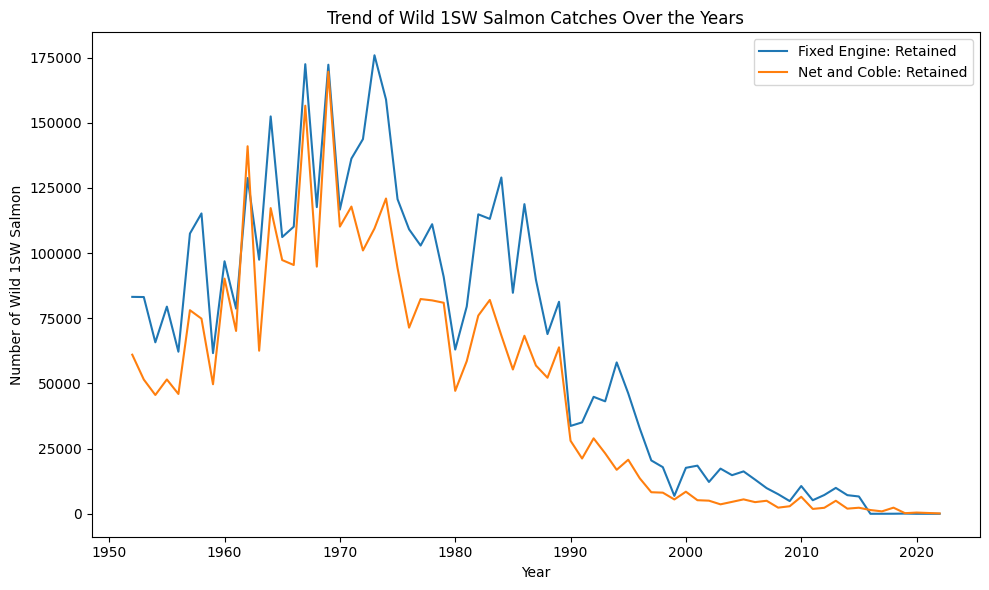

In [ ]:
yearly_catches = filtered_data.groupby(['Year', 'Method']).agg({
    'Wild 1SW number': 'sum'
}).reset_index()
# Plotting trends over time
fig, ax = plt.subplots(figsize=(10, 6))  # Change here to create only one plot
for method in significant_methods:
    subset = yearly_catches[yearly_catches['Method'] == method]
    ax.plot(subset['Year'], subset['Wild 1SW number'], label=method)  # Change here to plot on the single ax
ax.set_title('Trend of Wild 1SW Salmon Catches Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Wild 1SW Salmon')
ax.legend()

plt.tight_layout()
plt.show()  # Show the plot


**Analysis**

Trend of Wild 1SW Salmon Catches:
Similar trends are observed for Wild 1SW salmon, with "Fixed Engine: Retained." generally showing higher catches compared to "Net and Coble: Retained"
There is an overall decline in catches noticeable from around the late 1980s, which could suggest impacts from overfishing, changes in fish populations, or possibly enhanced regulatory measures.

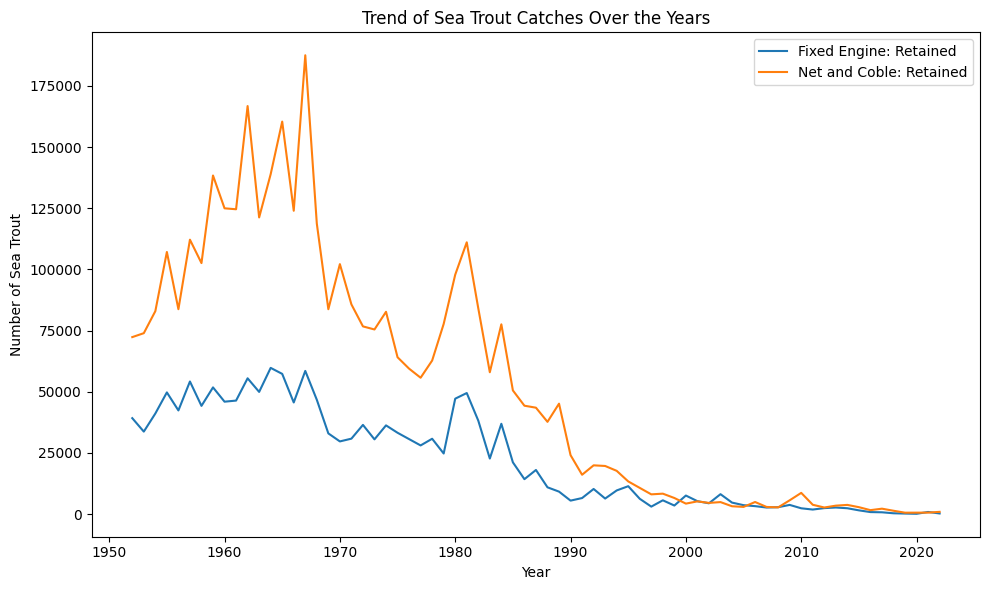

In [ ]:
yearly_catches = filtered_data.groupby(['Year', 'Method']).agg({
    'Sea trout number': 'sum',
}).reset_index()
# Plotting trends over time
fig, ax = plt.subplots(figsize=(10, 6))  # Change here to create only one plot
for method in significant_methods:
    subset = yearly_catches[yearly_catches['Method'] == method]
    ax.plot(subset['Year'], subset['Sea trout number'], label=method)  # Change here to plot on the single ax
ax.set_title('Trend of Sea Trout Catches Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Sea Trout')
ax.legend()

plt.tight_layout()
plt.show()  # Show the plot

**Analysis**

Post mid-1980s, both "Net and Coble" and "Fixed Engine" methods show a decline in catches. The decline is steeper for "Net and Coble". By 2020, both methods yield similar low catch levels, indicating equal ineffectiveness or external constraints. Historically, "Net and Coble" had higher catches but its effectiveness has significantly decreased over time. By 2020, both methods are similarly ineffective.

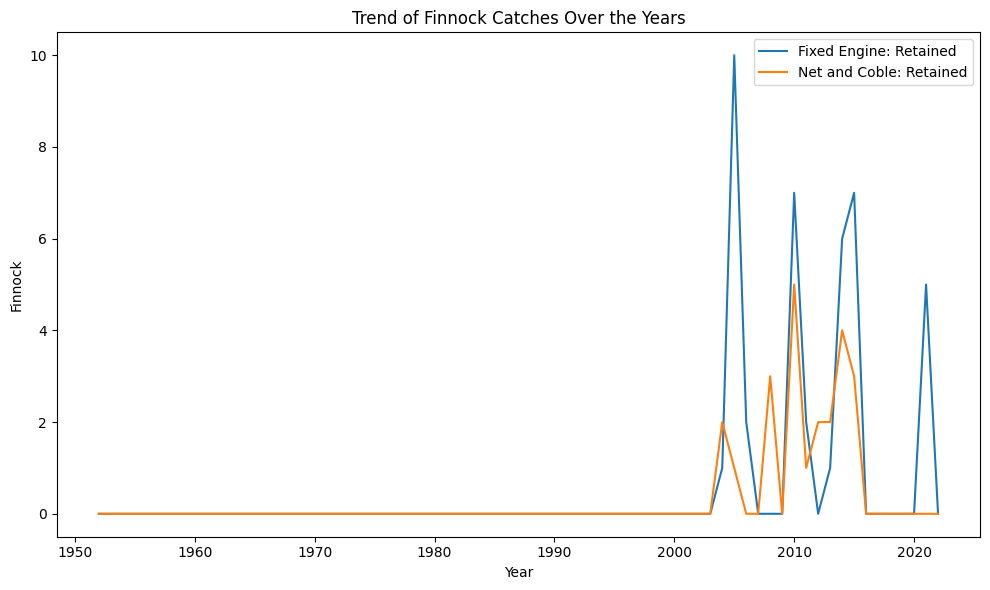

In [ ]:
yearly_catches = filtered_data.groupby(['Year', 'Method']).agg({
    'Finnock number': 'sum',
}).reset_index()
# Plotting trends over time
fig, ax = plt.subplots(figsize=(10, 6))  # Change here to create only one plot
for method in significant_methods:
    subset = yearly_catches[yearly_catches['Method'] == method]
    ax.plot(subset['Year'], subset['Finnock number'], label=method)  # Change here to plot on the single ax
ax.set_title('Trend of Finnock Catches Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Finnock')
ax.legend()

plt.tight_layout()
plt.show()  # Show the plot

**Analysis**

In terms of peak effectiveness, the Fixed Engine: Retained method had years where it outperformed the net and coble method by a significant margin. However, these high points do not represent consistent effectiveness due to the sharp declines that follow each peak.
By the final years shown on the chart, the catches using the Net and Coble method have decreased and do not show the same high peaks as before. This suggests a reduction in effectiveness, possibly due to external factors affecting finnock populations or changes in fishing practices.

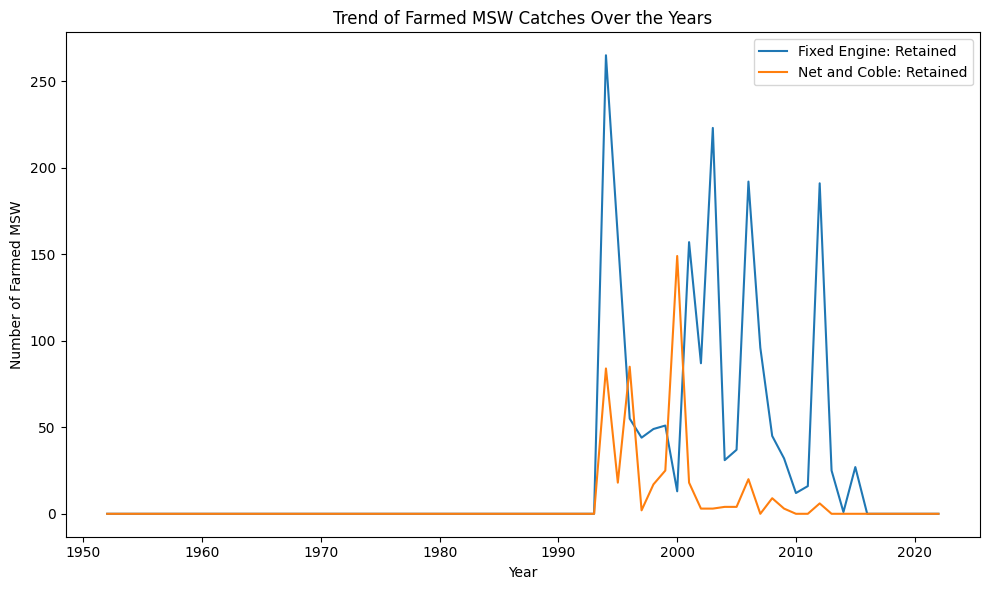

In [ ]:
yearly_catches = filtered_data.groupby(['Year', 'Method']).agg({
    'Farmed MSW number': 'sum',
}).reset_index()
# Plotting trends over time
fig, ax = plt.subplots(figsize=(10, 6))  # Change here to create only one plot
for method in significant_methods:
    subset = yearly_catches[yearly_catches['Method'] == method]
    ax.plot(subset['Year'], subset['Farmed MSW number'], label=method)  # Change here to plot on the single ax
ax.set_title('Trend of Farmed MSW Catches Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Farmed MSW')
ax.legend()

plt.tight_layout()
plt.show()  # Show the plot

**Analysis**

The Fixed Engine method had periods where it was significantly more effective than the Net and Coble method, as evidenced by the higher peaks on the chart. However, both methods appear to have experienced a general decline in catches from the early 2000s onwards.
By 2020, the effectiveness of both methods appears to be relatively low, with both trends converging towards the bottom of the chart. This could be due to several possible factors, including decreased farmed MSW populations, enhanced fish farm escape prevention methods, changes in legal regulations, or shifts in market demand affecting the effort put into capturing farmed fish.

In [ ]:
# Check the columns in the dataframe
print(filtered_data.columns)

# Ensure 'Method' column exists
if 'Method' in filtered_data.columns:
    print("'Method' column is present.")
else:
    print("'Method' column is missing. Please check the DataFrame creation steps.")


Index(['ï»¿District', 'District ID', 'Report order', 'Region', 'Method',
       'Year', 'Month', 'Month number', 'Wild MSW number',
       'Wild MSW weight (kg)', 'Wild 1SW number', 'Wild 1SW weight (kg)',
       'Sea trout number', 'Sea trout weight (kg)', 'Finnock number',
       'Finnock weight (kg)', 'Farmed MSW number', 'Farmed MSW weight (kg)',
       'Farmed 1SW number', 'Farmed 1SW weight (kg)', 'Netting effort'],
      dtype='object')
'Method' column is present.


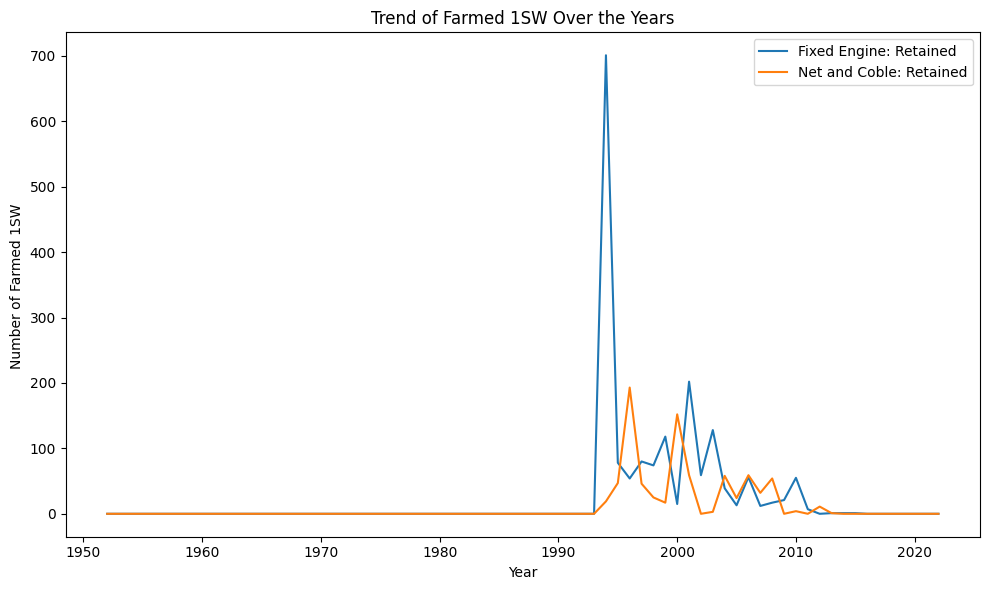

In [ ]:
yearly_catches = filtered_data.groupby(['Year', 'Method']).agg({
    'Farmed 1SW number': 'sum'
}).reset_index()

# Plotting trends over time
fig, ax = plt.subplots(figsize=(10, 6))  # Change here to create only one plot
for method in significant_methods:
    subset = yearly_catches[yearly_catches['Method'] == method]
    ax.plot(subset['Year'], subset['Farmed 1SW number'], label=method)  # Change here to plot on the single ax
ax.set_title('Trend of Farmed 1SW Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Farmed 1SW ')
ax.legend()

plt.tight_layout()
plt.show()  # Show the plot

**Analysis**

At its peak, the Fixed Engine method was more effective than the Net and Coble method. However, this was a singular event, and outside of this peak, the two methods appear to have similar levels of effectiveness with regards to the trends over time.
The overall decline in catches from the late 1990s onwards for both methods suggests a decreasing trend in the availability or accessibility of farmed 1SW salmon, or perhaps an increased regulation and conservation measures that limit the catches.
Towards the end of the timeline, both methods exhibit low levels of effectiveness, with the catch numbers being quite similar and close to the bottom of the chart. This convergence could imply that external factors such as regulations, changes in salmon farming practices, or biological factors have equalized the effectiveness of both fishing methods.